The data set comes to us from Kaggle and represents weekly retail scan data. <br>

### 0. Import the data and declare your package dependencies.

In [13]:
import pandas as pd
import numpy as np

avo = pd.read_csv("/Users/owenk/OneDrive/Documents/GitHub/GSB_544_ML/Lab 2/Data/avocado-updated-2020.csv")
avo.head()


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### 1. Briefly describe the data set. What information does it contain? <br>

This data contains 5 years of Hass avocado data (2015-2020), broken into the following columns: <br>
Date - The date of the observation<br>
AveragePrice - the average price of a single avocado<br>
type - conventional or organic<br>
year - the year<br>
Region - the city or region of the observation<br>
Total Volume - Total number of avocados sold<br>
4046 - Total number of avocados with PLU 4046 sold (Price look-up)<br>
4225 - Total number of avocados with PLU 4225 sold<br>
4770 - Total number of avocados with PLU 4770 sold<br>

### 2. Clean the data in any way you see fit.


In [143]:
#First, rename the columns 4046, 4225, 4770. Inplace = True preserves the original dataframe, and only renames the columns
avo.rename(columns={'4046': 'Small_Hass_PLU', '4225': 'Med_Hass_PLU', '4770': 'Large_Hass_PLU'}, inplace = True) 

#remove NA rows to start, axis = 0 for rows, not columns
avo_c = avo.dropna(axis = 0)

#Begin with geography: start by counting how many unique values there are in geography, using nunique method which counts the number of unique values in geography column
geo_uniq_cnt = avo_c['geography'].nunique() 
#54 unique values

#print the unique values as a list. Assigning new df using .unique method for a df of unique geography variables 
geo_uniq = pd.DataFrame(avo_c['geography'].unique())

#Now that we have the unique values, we need to map region type using information from geography: 
#key map for region type based on the values in geography. manually typed out based on geo_uniq. 
region_type = {  
    'West': 'Region',
    'Southeast': 'Region',
    'South Central': 'Region',
    'Northeast': 'Region',
    'Midsouth': 'Region',
    'California': 'Other',
    'Total U.S.': 'Other'
}

#for loop function, defines region_type column based on the above map. Here we define a new function region_typef. 
def region_typef(geography):#function is region_typef, and argument is geography
    for key in region_type.keys(): #iterates throught the keys in the key map above (left column) 
        if key in geography: 
            return region_type[key] #return the right column from above key map, returns the defined region
    return 'Metro' #if the geography value is a city, or multi city area, classify as Metro in region type
avo_c['Region_Type'] = avo_c['geography'].apply(region_typef) #lastly, apply the function to the cleaned dataframe
avo_c.head()

,date,average_price,total_volume,Small_Hass_PLU,Med_Hass_PLU,Large_Hass_PLU,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Region_Type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro


### 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [134]:
# using region from region_type, organic from type, 2017 from year, and small hass PLU
#Here, we create a new dataframe, that filters the original dataframe for region and organic and 2017
df3 =  avo_c[(avo_c["Region_Type"] == "Region") &
             (avo_c["type"] == "organic") &
             (avo_c["year"] == 2017)]
# use df3 to answer the question
#groupby region, then sum small Hass for region 
a3 = df3.groupby('geography')['Small_Hass_PLU'].sum()
print(a3.idxmax()) #idxmax returns the id of the maximum value in a3, as opposed to .max, which returns the maximum value without the id. 

West


The West region sold the most total organic, small Hass avocados in 2017.

### 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [56]:
df4 = avo_c
#dt.month/day taken from stack overflow. .to_datetime makes the changes the date column into a standardized date format, as opposed to a string.
df4['date'] = pd.to_datetime(df4['date'])

#these lines use the .dt.month method to create new columns automatically, for month and day, using the standarized values in date column.
df4['month'] = df4['date'].dt.month
df4['day'] = df4['date'].dt.day

#grouping by month column, take the means of total volume, and create a new df named a4. 
a4 = df4.groupby('month')['total_volume'].mean() 
print(a4.idxmax()) 

5


May has the highest average volume of avocado sales.

### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [87]:
#Process: filter a new df for metro areas, find the top 5, then plot volume as geom_boxplot

df5 =  avo_c[(avo_c["Region_Type"] == "Metro")]

#create a new df. group old df by geography column and sum the Total volume to get a single value for each metro area  
df_grouped = df5.groupby('geography')['total_volume'].sum().reset_index()

#sort the values by descending total_value, then find the top 5
a5 = df_grouped.sort_values(by = 'total_volume', ascending = False).head(5)
a5.head()

,geography,total_volume
14,Great Lakes,1.220448e+09
21,Los Angeles,9.593505e+08
32,Plains,6.352576e+08
26,New York,5.282452e+08
10,Dallas/Ft. Worth,4.362042e+08


Great Lakes, Los Angeles, Plains, New York, Dallas/Ft. Worth sold the most avocados.  

C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\1463707753.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


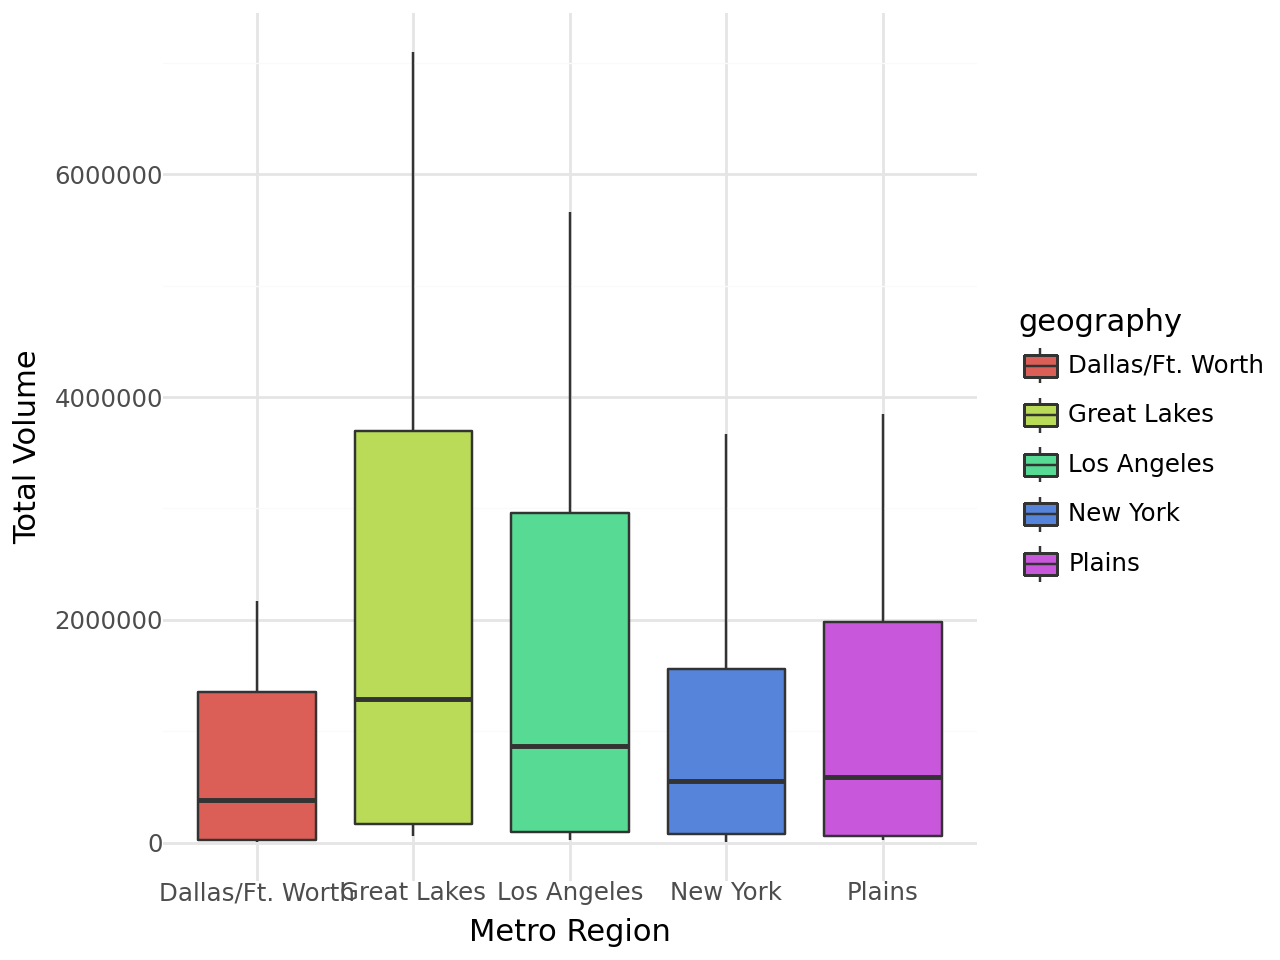

In [106]:
from plotnine import ggplot, aes, labs, geom_boxplot, theme_minimal, stat_summary 

#isolate top 5 from above, excluding all other regions. Set the result as a new df which we will plot. 
# .isin method filters df rows based on whether a column's values are contained within a list.
df5_ftr = df5[df5['geography'].isin(a5['geography'])]

#boxplot
a5_plot = (ggplot(df5_ftr, aes(x='geography', y='total_volume', fill='geography'))
          + geom_boxplot() 
          + labs(x="Metro Region", y="Total Volume")
          + theme_minimal()
)
print(a5_plot)

### 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [144]:
#filter geography using | (or) (similar to above using & (and))
#creating a new df that equals the previous df with conditions. Geography conditions then looped into new df.
df6 = avo_c[(avo_c["geography"] == "Los Angeles") | 
            (avo_c["geography"] == "San Diego") | 
            (avo_c["geography"] == "Sacramento") | 
            (avo_c["geography"] == "San Francisco")]
df6.head()

,date,average_price,total_volume,Small_Hass_PLU,Med_Hass_PLU,Large_Hass_PLU,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Region_Type
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Metro
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Metro
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Metro
83,2015-01-04,1.23,19089.36,17522.46,735.22,2.87,828.81,828.81,0.00,0.00,organic,2015,San Diego,Metro
84,2015-01-04,0.99,907795.89,179507.69,637000.10,8803.79,82484.31,82033.71,444.44,6.16,conventional,2015,San Francisco,Metro
85,2015-01-04,1.18,22630.58,13175.57,9028.34,0.00,426.67,426.67,0.00,0.00,organic,2015,San Francisco,Metro
152,2015-01-11,0.85,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,conventional,2015,Los Angeles,Metro
153,2015-01-11,1.08,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,organic,2015,Los Angeles,Metro


### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [156]:
#begin by creating a new df, equal to the previous and filter by organic type only
a7_organic = df6[df6['type'] == 'organic']

#here we group a new df by the average of average price for each of the 4 geography groups
a7_org_prices = a7_organic.groupby('geography')['average_price'].mean()

#repeating the process with conventional 
a7_conventional = df6[df6['type'] == 'conventional']
a7_con_prices = a7_conventional.groupby('geography')['average_price'].mean()

#take the difference of the the above dfs and save as a separate df
dif = a7_org_prices - a7_con_prices

#the data frame dif will serve as our summary statistics
print(dif)
print(dif.idxmax()) 

geography
Los Angeles      0.527778
Sacramento       0.578497
San Diego        0.684510
San Francisco    0.718954
Name: average_price, dtype: float64
San Francisco


Summary statistics: The difference of the mean average price for organic and conventional in each city are listed above. <br>

San Francisco is the region in California with the highest difference in price from Organic to Conventional. 

C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\1916552850.py:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


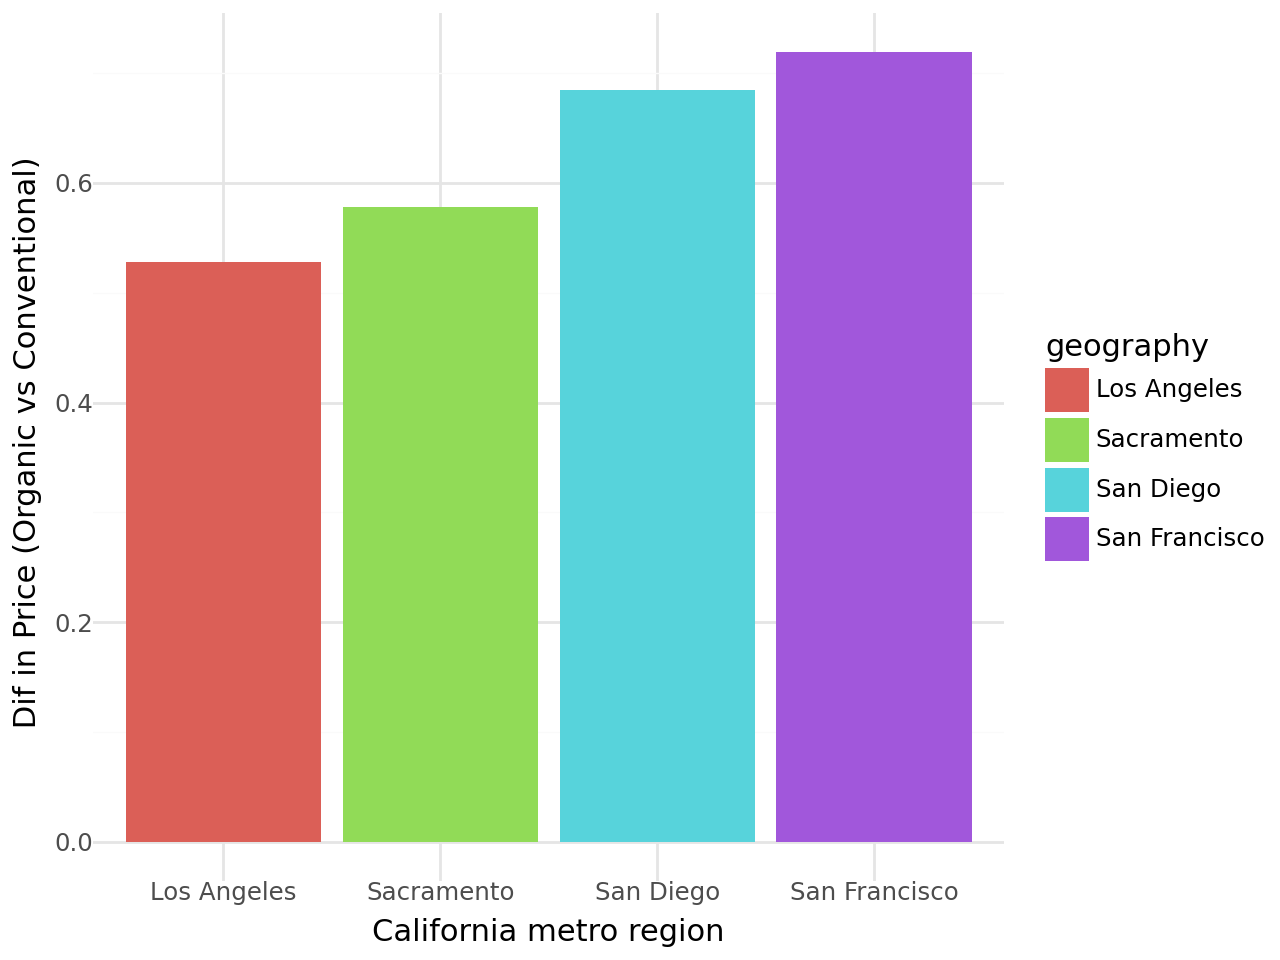

In [291]:
#visualization
from plotnine import geom_bar

#Combining the 3 tables into 1
combined_df = pd.DataFrame({
    'organic_avg_price': a7_org_prices,
    'conventional_avg_price': a7_con_prices,
    'price_difference': dif
})
combined_df = combined_df.reset_index() #reset index: resets the index to default. We do this to make sure the combined_df is clean and interpretable.

#bargraph
a7_plot = (ggplot(combined_df, aes(x='geography', y='price_difference', fill='geography'))
           + geom_bar(stat='identity')  # stat='identity' to plot actual values
           + labs(x="California metro region", y=" Dif in Price (Organic vs Conventional)")
           + theme_minimal()
)

print(a7_plot)

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\1995347784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\1995347784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\1995347784.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

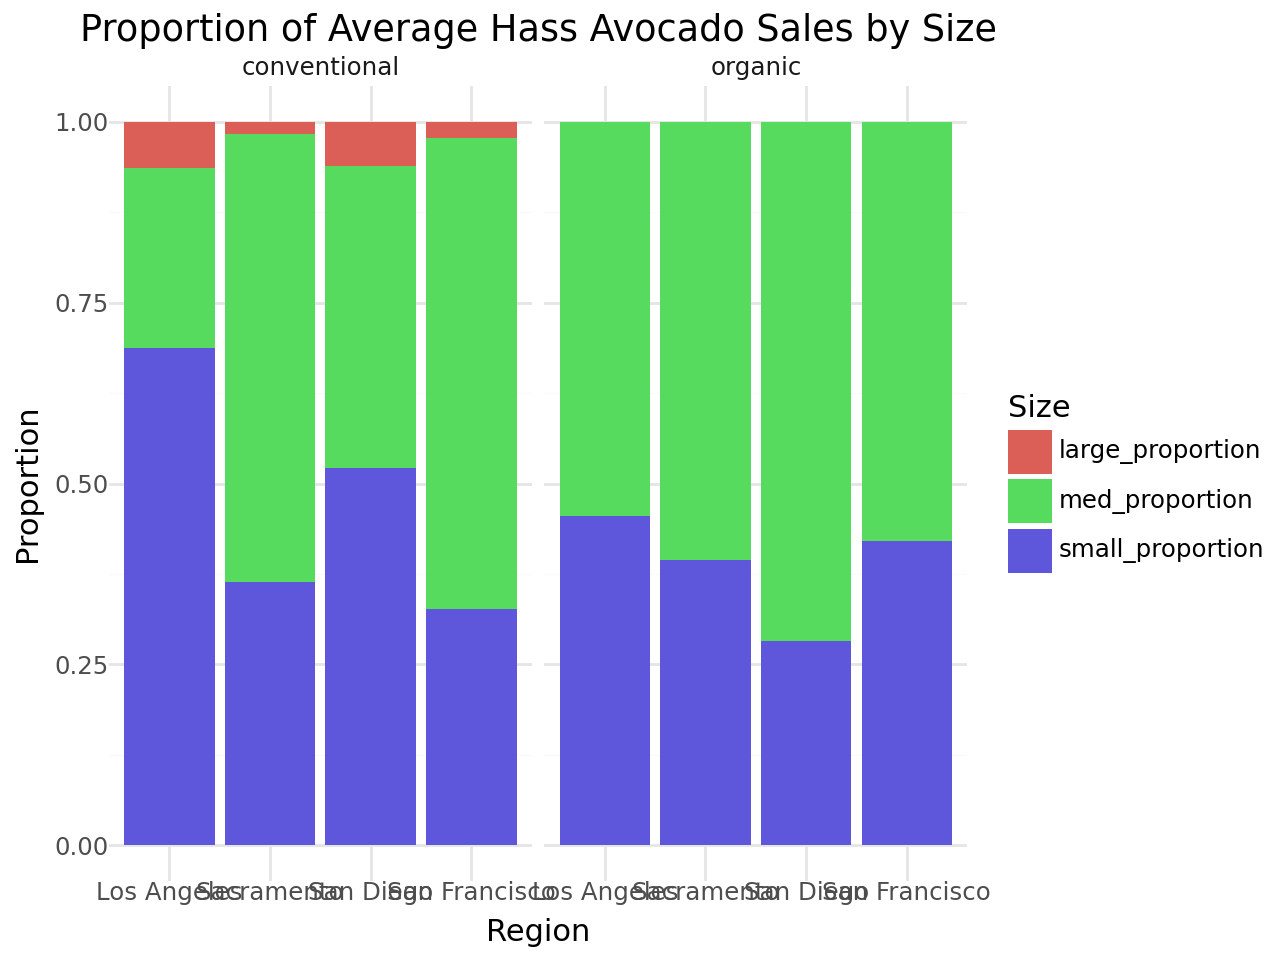

In [292]:
from plotnine import geom_bar, facet_wrap  
import matplotlib.pyplot as plt

#Create a new df. Add new columns to the df: first is total proportion, taken by adding the PLUs for each row. This value is different from total_volume which is why we need it to compare proportions for each row value.
#Second we add columns for the proportion of each row value based on its PLU (take each PLU and divide by the calculated total proportion from the the first process)
df8 = df6
df8['total_prop'] = df8['Small_Hass_PLU'] + df8['Med_Hass_PLU'] + df8['Large_Hass_PLU']
df8['small_proportion'] = df8['Small_Hass_PLU'] / df8['total_prop']
df8['med_proportion'] = df8['Med_Hass_PLU'] / df8['total_prop']
df8['large_proportion'] = df8['Large_Hass_PLU'] / df8['total_prop']

#create a new df. Here we group the new df by geography and type, while taking the means of the proprtion values from above. This should result in 8 rows: the 4 metro areas separated into organic and conventional mean values.  
a8 = df8.groupby(['geography', 'type'])[['small_proportion', 'med_proportion', 'large_proportion']].mean().reset_index()

#melt dataframe to long format:
#pd.melt is used to change the format from wide to long, neccessary for plotting. 
#id_vars represent the identifiers in the long format. These values are not melted.
#value_vars represent the columns that are being converted into a single column (labeled by value_name)
#var_name: this is the title of the new column with the proprtion classification, which used to be a column title. Now it is under the Size column and corresponds with the values from Proportion column. 
df8_melted = pd.melt(a8, id_vars=['geography', 'type'],
                     value_vars=['small_proportion', 'med_proportion', 'large_proportion'],
                     var_name='Size', 
                     value_name='Proportion')

#facet wrap: this splits the plot into 4 distinct plots, separating based on type value(organic and conventional)
a8_plot = (ggplot(df8_melted, aes(x = 'geography', y = 'Proportion', fill = 'Size'))
           + geom_bar(stat = 'identity', position = 'stack')
           + labs(x = "Region", y = "Proportion", title = "Proportion of Average Hass Avocado Sales by Size")
           + theme_minimal()
           + facet_wrap('~type'))
print(a8_plot)

### A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim. Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set. Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales. Support your argument with a plot.

This data set was downloaded from historical data recorded by the California Association of Realtors (https://www.car.org/marketdata/data/housingdata).


In [ ]:
#cleaning house data
house = pd.read_excel("/Users/owenk/OneDrive/Documents/GitHub/GSB_544_ML/Lab 2/Data/MedianPricesofExistingDetachedHomesHistoricalData.xlsx")

#filter out non-relevent areas (by keeping only relevant columns, and saving as a new df) 
house_c = house[['Mon-Yr', 'Sacramento', 'San Diego', 'San Francisco', 'Los Angeles']]

#filter dates to 2015-2020, to match avo_c. We will use this to later join on month and year. Method used is same as from earlier problem.
house_c['Mon-Yr'] = pd.to_datetime(house_c['Mon-Yr'])
house_c['year'] = house_c['Mon-Yr'].dt.year
house_c['month'] = house_c['Mon-Yr'].dt.month

#here, we isolate the timeframe to match the avocado time frame. 
#we do this by choosing year rows that are greater than or equal to 2015, but less than or equal to 2020.
house_cf = house_c[(house_c['year'] >= 2015) & (house_c['year'] <= 2020)]

#rename the date column in house df to match avocado column 
#DISCLAIMER: I don't join on date, but the code is preserved for my own understanding of joining principles 
house_cf = house_cf.rename(columns = {'Mon-Yr': 'date'})

#Similar to the process in question 8, we need to change the format of the house df from wide to long. 
#Keep date, month, year as columns 
#Create new House_Region column containing the corresponding city (to price, which is now in the column House_Price)
house_cf_long = house_cf.melt(id_vars=['date', 'month', 'year'], 
                               value_vars=['Sacramento', 'San Diego', 'Los Angeles', 'San Francisco'],
                               var_name='House_Region', 
                               value_name='House_Price')

#Renaming the House_Region to geography. This will be one of the columns joined in avocado df
house_cf_long = house_cf_long.rename(columns = {'House_Region': 'geography'})


In [293]:
#clean df6 for prep: convert date to datetime and month for join
df6['date'] = pd.to_datetime(df6['date'])
df6['month'] = df6['date'].dt.month

#join house_cf onto df6. Using outer join for transparency in analysis. Since we join on month and year, not date, the type of join is neglible. 
avo_house = df6.merge(house_cf_long, on = ['month', 'year', 'geography'], how = "outer")


C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\2232018034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\2232018034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\owenk\AppData\Local\Temp\ipykernel_19376\2860039719.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
c:\Users\owenk\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


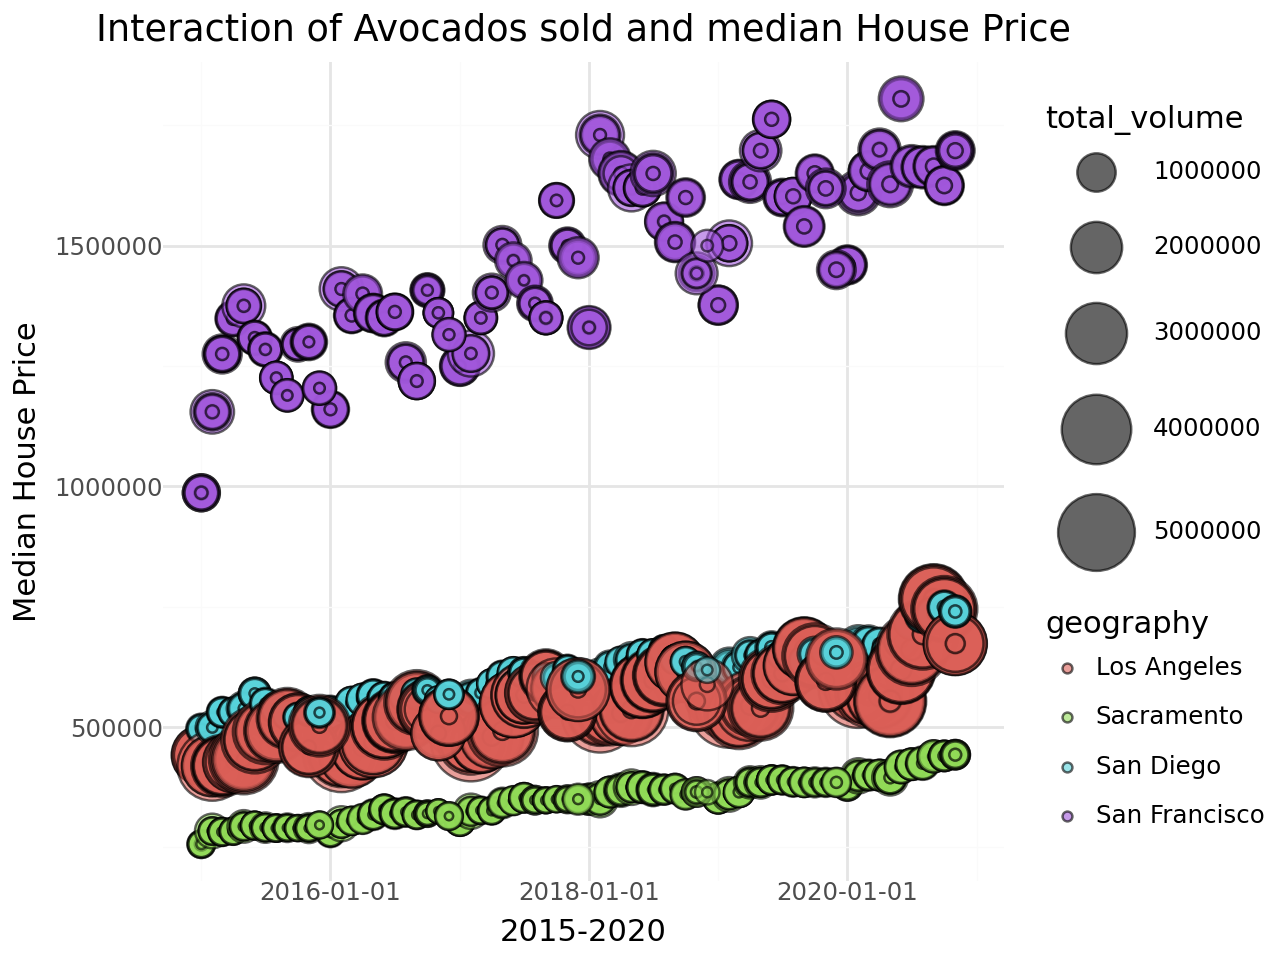

In [298]:
#plot 
from plotnine import geom_point, theme, scale_size_continuous

#scale_size_continuous range is relatively large, to show sensitive changes in total_volume
avo_house_plot = (ggplot(avo_house, aes(x='date_y', y = 'House_Price', size = 'total_volume', fill = 'geography'))
          + geom_point(alpha = .6)
          + scale_size_continuous(range=(1, 16)) 
          + theme_minimal()
          + labs(x = '2015-2020', y = 'Median House Price', title = 'Interaction of Avocados sold and median House Price')
                    
)
print(avo_house_plot)

I decided to make a bubble plot, in order to show the dimensions desired. The plot is not facet_wrapped for comparability. <br>
According the data, represented in the graph above, avocado toast is likely not the reason why millenials can't afford homes. If this were the case, we should have seen some change in the volume of avocados, in relation to home price. As a counter example, if we saw a static median house price and a rise in total volume of avocados sold, we may infer that millenials are buying more avocados than in years prior, possibly hindering their ability to buy a home. However, we see the opposite instead; the median house prices in each California region have consistently been increasing in the past 5 years, while the volume of avocados sold have remained constant, relative to each region. In addition, the city with highest median house price does not consume the most avocados (San Francisco). <br>
Home prices appear to be much more affected by unknown variables, such as economic cycles and inflation. We do not have enough information to say why millenials can not afford homes, but we can safely say that it is not due to avocado toast.  